In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2.1. Numpy ndarray - создание

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

* статическая типизация и гомогенность;
* возможность компиляции функций, работающих с статистически типизированными объектами;
* как следствие, эффективное использование RAM и CPU;
* broadcasting (рассмотрим далее).

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4], dtype=np.int16)

In [4]:
a.shape

(4,)

Интереснее, если массив n-мерный: тогда помогает stride (https://en.wikipedia.org/wiki/Stride_of_an_array) и shape массива. Shape - кортеж, который указывает число элементов в каждом измерении. Stride - кортеж, отступ между элементами массива в каждом измерении.

In [5]:
a = np.array([[1, 2], [3, 4]])

In [6]:
a.size

4

In [7]:
a.shape

(2, 2)

In [8]:
a.dtype

dtype('int64')

In [9]:
a.itemsize

8

In [10]:
a.nbytes

32

--N: рассмотрим тот же массив array([[1, 2], [3, 4]])

Как используется strides? Два основных типа хранения элементов:
* C order (row-major), тогда наш массив будет хранится в виде [1,2,3,4];
* Fortran order (column-major), [1,3,2,4].

In [11]:
a.strides

(16, 8)

In [12]:
np.array(a, order='F').strides

(8, 16)

24 для строчки из 3 элементов, итд...

http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.strides.html

При желании, можно использовать np.size(np.object) и np.shape(np.object):

In [13]:
np.size(a)

4

In [14]:
np.shape(a)

(2, 2)

При необходимости, не стоит принебрегать встроенной справкой:

In [15]:
np.array?

И специальными функциями numpy:

In [16]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
numpy.lib.ar

и IPython:

In [17]:
np.con*?

Разумеется, произвольно присваивать значения элементам массива нельзя:

In [18]:
a[0,0] = "hello"

ValueError: invalid literal for long() with base 10: 'hello'

In [19]:
a[0,0] = 100

**Создание массивов**

Создавать из списков мы уже умеем:

In [20]:
 np.array([1,2,3,4], dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

Разумеется, главное - чтобы объект, корый передается конструктору, поддерживал протокол итерации.

In [21]:
 np.array((1,2,3,4), dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

In [22]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [23]:
np.linspace(0, 1, 25)

array([ 0.        ,  0.04166667,  0.08333333,  0.125     ,  0.16666667,
        0.20833333,  0.25      ,  0.29166667,  0.33333333,  0.375     ,
        0.41666667,  0.45833333,  0.5       ,  0.54166667,  0.58333333,
        0.625     ,  0.66666667,  0.70833333,  0.75      ,  0.79166667,
        0.83333333,  0.875     ,  0.91666667,  0.95833333,  1.        ])

In [24]:
np.logspace(0, 10, 10)

array([  1.00000000e+00,   1.29154967e+01,   1.66810054e+02,
         2.15443469e+03,   2.78255940e+04,   3.59381366e+05,
         4.64158883e+06,   5.99484250e+07,   7.74263683e+08,
         1.00000000e+10])

In [25]:
np.ones((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [26]:
np.zeros((3, 2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [27]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [28]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

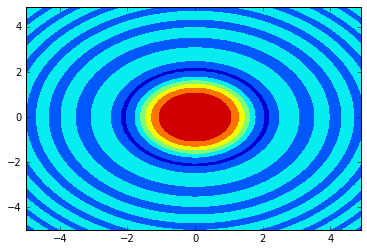

In [29]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [30]:
xx.shape

(1, 100)

In [31]:
yy.shape

(100, 1)

** Случайные массивы **

на интервале [0,1]:

In [32]:
np.random.rand(3,2)

array([[ 0.73640085,  0.40226733],
       [ 0.26456703,  0.02839358],
       [ 0.90225589,  0.32675399]])

Нормально распределенные:

In [33]:
np.random.randn(3,2)

array([[-0.18349449, -0.26453235],
       [ 0.56441419,  2.06208039],
       [ 0.28924139,  0.85614796]])

-- N: иногда полезно получить случайное целое число:

In [34]:
np.random.randint(2,10)

3

In [35]:
np.random.random_integers(2,10)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(2, 10 + 1) instead
  if __name__ == '__main__':


5

# 2.2. Numpy ndarray - индексы

Отдельно рассмотрим 1-мерный и многомерные массивы.

In [36]:
np.random.rand(3,)[1]

0.88442910915164974

Для одномерного массива получим сразу элемент, который находится по данному индексу. Для n-мерного массива подобная индексация вернет массив размера n-1.

In [37]:
np.random.rand(3,5,10)[1].shape

(5, 10)

In [38]:
np.random.rand(3,5)[1].shape

(5,)

Можно использовать ':' вместо индекса:

In [39]:
A = np.random.rand(3,5)

In [40]:
A

array([[ 0.30292741,  0.0628712 ,  0.05003036,  0.98249377,  0.45679645],
       [ 0.12236576,  0.3760541 ,  0.25027891,  0.58453253,  0.80292126],
       [ 0.04912802,  0.10560583,  0.25594727,  0.53555793,  0.33840154]])

In [41]:
A[0,:]

array([ 0.30292741,  0.0628712 ,  0.05003036,  0.98249377,  0.45679645])

In [42]:
A[:,0]

array([ 0.30292741,  0.12236576,  0.04912802])

Поддерживается стандартный протокол - python slicing syntax ([lower:upper:step]) :

In [43]:
A[0,:]

array([ 0.30292741,  0.0628712 ,  0.05003036,  0.98249377,  0.45679645])

In [44]:
A[0,:][0:4:2]

array([ 0.30292741,  0.05003036])

Операция slicing создает т.н. view - то есть данные не копируются, поэтому исходный объект по адресу - mutable.

In [45]:
A[0,:][0:4:2] = [1.0, 2.5]

In [46]:
A

array([[ 1.        ,  0.0628712 ,  2.5       ,  0.98249377,  0.45679645],
       [ 0.12236576,  0.3760541 ,  0.25027891,  0.58453253,  0.80292126],
       [ 0.04912802,  0.10560583,  0.25594727,  0.53555793,  0.33840154]])

Параметры для slicing могут пропускаться:

In [47]:
A[0,:][0:4:2]

array([ 1. ,  2.5])

In [48]:
A[0,:][0:4]

array([ 1.        ,  0.0628712 ,  2.5       ,  0.98249377])

In [49]:
A[0,:][:3]

array([ 1.       ,  0.0628712,  2.5      ])

In [50]:
A[0,:][::-1]

array([ 0.45679645,  0.98249377,  2.5       ,  0.0628712 ,  1.        ])

In [51]:
A[0,:][-3:]

array([ 2.5       ,  0.98249377,  0.45679645])

** Fancy Indexing **

Этим термином обозначается индексирование с помощью массивов (или иных итерируемых конструкций).

In [52]:
row_indices = [1, 2]
A[row_indices]

array([[ 0.12236576,  0.3760541 ,  0.25027891,  0.58453253,  0.80292126],
       [ 0.04912802,  0.10560583,  0.25594727,  0.53555793,  0.33840154]])

In [53]:
col_indices = [1, -1]
A[row_indices, col_indices]

array([ 0.3760541 ,  0.33840154])

Возможно Булево индексирование (**Boolean indexing**):

In [54]:
B = np.array([n for n in xrange(5)])
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [55]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Это очень удобно, как вы наверняка догадались, если мы хотим отобрать данные, отвечающие определенным условиям:

In [56]:
x = np.arange(0, 10, 0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [57]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False], dtype=bool)

In [58]:
x[mask]

array([ 5.5,  6. ,  6.5,  7. ])

Получить список индексов элементов, отвечающих заданной маске, можно с помощью **which**:

In [59]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [60]:
x[indices]

array([ 5.5,  6. ,  6.5,  7. ])

**take** еще одна конструкция выбора элементов массива:

In [61]:
v = np.arange(-3,3)
row_indices = [1, 3, 5]

In [62]:
v[row_indices]

array([-2,  0,  2])

In [63]:
v.take(row_indices)

array([-2,  0,  2])

In [64]:
np.take(v, row_indices)

array([-2,  0,  2])

** choices ** - полезная функция для выбора элеметов из нескольких массивов:

In [65]:
which = [1, 0, 1, 0]
choices = [[-1,-2,-3,-4], [1,2,3,4]]
np.choose(which, choices)

array([ 1, -2,  3, -4])

** compress ** - альтернативой Булевому индексированию:

In [66]:
a = np.array([[1, 2], [3, 4], [5, 6]])
np.compress([False, True, True], a, axis=0)

array([[3, 4],
       [5, 6]])

** При этом take может работать быстрее**:

In [67]:
a = np.random.rand(10000, 100)
ind = np.random.randint(low=0, high=10000, size=10000)

In [68]:
%timeit -n 100 b = a[ind,:]

100 loops, best of 3: 1.47 ms per loop


In [69]:
%timeit -n 100 b = np.take(a, ind, axis=0)

100 loops, best of 3: 1.6 ms per loop


In [70]:
np.array_equal(a[ind,:], np.take(a, ind, axis=0))

True

** Также быстрее может работать compress **:

In [71]:
ind = a[:,0] > .5

In [72]:
%timeit -n 10 b = a[ind,:]

10 loops, best of 3: 854 µs per loop


In [73]:
%timeit -n 10 b = np.compress(ind, a, axis=0)

10 loops, best of 3: 889 µs per loop


## TLDR:
* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

# 2.3. Numpy ndarray - элементарные операции с массивами

** Broadcasting **

Концепеция broadcasting является ключевой для понимания операций с массивами. Обычно, операции с массивами производятся поэлементно. 

In [74]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,2.0,2.0])

In [75]:
a * b

array([ 2.,  4.,  6.])

Что, если массивы разного размера? Начнем с простого - скаляр и вектор:

In [76]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a * b

array([ 2.,  4.,  6.])

Все просто - скаляр словно "вырастает" (broadcasted) до размеров вектора и производится поэлементная операция (разумеется, это умозрительная аналогия - новый вектор из 2 не создается!).

Общее правило таково:

операция может произведена если размерность "крайних" осей массивов совпадает (trailing dimension), либо один из элементов является скаляром.

Пример из оффициальной документации:

In [77]:
'''

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

'''
pass

а вот эти опреции дадут вам ошибку:

In [78]:
'''
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
'''
pass

In [79]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

print x.shape

print y.shape

x + y

(4,)
(5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [80]:
print xx.shape
print y.shape
print (xx + y).shape
print xx + y

print '-------'

print x.shape
print z.shape
print (x + z).shape
print x + z

(4, 1)
(5,)
(4, 5)
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]]
-------
(4,)
(3, 4)
(3, 4)
[[ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]]


Классный пример из официальной документации:

In [81]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[  1.,   2.,   3.],
       [ 11.,  12.,  13.],
       [ 21.,  22.,  23.],
       [ 31.,  32.,  33.]])

In [82]:
a[:, np.newaxis]

array([[  0.],
       [ 10.],
       [ 20.],
       [ 30.]])

In [83]:
a[:, np.newaxis].shape

(4, 1)

** Операции вида "массив - скаляр" **

In [84]:
A

array([[ 1.        ,  0.0628712 ,  2.5       ,  0.98249377,  0.45679645],
       [ 0.12236576,  0.3760541 ,  0.25027891,  0.58453253,  0.80292126],
       [ 0.04912802,  0.10560583,  0.25594727,  0.53555793,  0.33840154]])

In [85]:
A + 2

array([[ 3.        ,  2.0628712 ,  4.5       ,  2.98249377,  2.45679645],
       [ 2.12236576,  2.3760541 ,  2.25027891,  2.58453253,  2.80292126],
       [ 2.04912802,  2.10560583,  2.25594727,  2.53555793,  2.33840154]])

** Операции вида "массив - массив" **

Производятся поэлементно с учетом правил broadcasting:

In [86]:
A * A

array([[  1.00000000e+00,   3.95278767e-03,   6.25000000e+00,
          9.65294012e-01,   2.08662996e-01],
       [  1.49733794e-02,   1.41416683e-01,   6.26395315e-02,
          3.41678282e-01,   6.44682550e-01],
       [  2.41356209e-03,   1.11525921e-02,   6.55090063e-02,
          2.86822297e-01,   1.14515601e-01]])

In [87]:
A / A

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

** Матричные операции**

In [88]:
A = np.random.rand(3,3)

In [89]:
np.dot(A,A)

array([[ 0.74078045,  0.5170042 ,  0.53825262],
       [ 0.8936281 ,  1.11644062,  1.03690914],
       [ 1.27807543,  1.10512629,  1.12084961]])

In [90]:
v = np.random.randn(3)

In [91]:
np.dot(A,v)

array([-0.12927352,  1.35551026,  0.04380842])

In [92]:
np.dot(v,v)

3.9879085418545612

Если хочется использовать по умолчанию операции из матричной алгебры, то можно использовать конструктор matrix().

In [93]:
M = np.matrix(A)

In [94]:
v1 = np.matrix(v).T

In [95]:
M.shape

(3, 3)

In [96]:
v1.shape

(3, 1)

In [97]:
v1.T * v1

matrix([[ 3.98790854]])

In [98]:
M * v1

matrix([[-0.12927352],
        [ 1.35551026],
        [ 0.04380842]])

** Преобразование массивов**

In [99]:
A.T

array([[ 0.64024132,  0.10456974,  0.99958672],
       [ 0.22244252,  0.77758609,  0.65516494],
       [ 0.30773792,  0.74567442,  0.56982377]])

In [100]:
C = np.matrix([[1j, 2j], [3j, 4j]])

In [101]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Эрмитово сопряжение:

In [102]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

In [103]:
np.real(C)

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [104]:
np.imag(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

** "Flattening" массива **

In [105]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [106]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [107]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

** reshape **

In [108]:
a.shape

(2, 3)

In [109]:
b = a.ravel()

In [110]:
b = b.reshape((2, 3))

In [111]:
b

array([[1, 2, 3],
       [4, 5, 6]])

** resize **

In [112]:
a = np.arange(4)

In [113]:
a.resize((8,))

In [114]:
a

array([0, 1, 2, 3, 0, 0, 0, 0])

** repeat **

In [115]:
a = np.array([[1, 2], [3, 4]])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [116]:
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

** concatenate **

In [117]:
a

array([[1, 2],
       [3, 4]])

In [118]:
b = np.array([[5, 6]])

In [119]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [120]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Что касается параметра axis, то иллюстрировать его использование можно следующим образом:

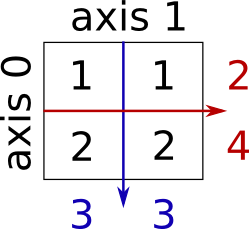

In [121]:
from IPython.display import Image
Image(filename='axis.png')

** hstack **

Название говорит само за себя - horizontal stack.

In [122]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

In [123]:
a.shape

(2, 2)

In [124]:
b.T.shape

(2, 1)

** vstack **

In [125]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [126]:
a.shape

(2, 2)

In [127]:
b.shape

(1, 2)

** Копии и view **

Мы помним, что очень важно различать копирование объекта и присваивание новой ссылки на объект. Numpy в этом смысле не отличается от списков:

In [128]:
A = np.array([[1, 2], [3, 4]])

In [129]:
B = A

In [130]:
B[0,0] = 10

In [131]:
A

array([[10,  2],
       [ 3,  4]])

Если это не тот тип поведения, который нам нужен - следует использовать np.copy():

In [132]:
B = np.copy(A)

In [133]:
B[0,0] = 100

In [134]:
A

array([[10,  2],
       [ 3,  4]])

Важно помнить, что если вы используете view массива, то копии вы не создаете!

In [135]:
a = np.arange(10)

In [136]:
b = a[::2]

In [137]:
np.may_share_memory(a, b)

True

In [138]:
c = a[::2].copy()
np.may_share_memory(a, c)

False

In [139]:
d = a.T
np.may_share_memory(a, d)

True

Как следствие - никогда не делайте так:

In [140]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [141]:
a += a.T

In [142]:
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## TLDR:
* следует отличать копию массива и view;
* при осуществлении операций помните про правила broadcasting;
* запомните hstack и vstack.

# 2.4. Numpy - основные функции.

** Встроенные функции массива **

In [143]:
m = np.random.rand(3,3)

In [144]:
m.sum()

4.4925886478148946

In [145]:
m.max()

0.91137245208591067

** Всегда используйте встроенные функции! **

In [146]:
a = np.random.rand(100000)

In [151]:
% timeit -n 1000 max(a)

1000 loops, best of 3: 4.38 ms per loop


In [152]:
% timeit -n 1000 a.max()

1000 loops, best of 3: 24.1 µs per loop


In [153]:
% timeit -n 1000 sum(a)

1000 loops, best of 3: 6.39 ms per loop


In [154]:
% timeit -n 1000 a.sum()

1000 loops, best of 3: 35.1 µs per loop


Просто считать сумму элементов матрицы или находить максимальный элемент не так интересно, и тут нам помогают axis:

In [155]:
m

array([[ 0.20460871,  0.34020729,  0.14454074],
       [ 0.43060176,  0.33601263,  0.91137245],
       [ 0.84603216,  0.60084497,  0.67836793]])

In [156]:
m.sum(axis=0)

array([ 1.48124263,  1.27706489,  1.73428112])

In [157]:
m.sum(axis=1)

array([ 0.68935675,  1.67798685,  2.12524506])

In [158]:
m.max(axis=0)

array([ 0.84603216,  0.60084497,  0.91137245])

Очень полезно произведение всех элементов:

In [159]:
m.prod(axis=1)

array([ 0.01006139,  0.13186432,  0.3448376 ])

Кумулятивная сумма элементов:

In [160]:
a.cumsum() * 100

array([  2.32749569e+01,   1.05242369e+02,   1.13457128e+02, ...,
         5.01192512e+06,   5.01194413e+06,   5.01199565e+06])

Кумулятивное произведение:

In [161]:
a.cumprod()

array([ 0.23274957,  0.1907788 ,  0.01567202, ...,  0.        ,
        0.        ,  0.        ])

**Простые статистики**

**Среднее**

In [162]:
m.mean(axis=0)

array([ 0.49374754,  0.4256883 ,  0.57809371])

In [163]:
np.mean(m, axis=0)

array([ 0.49374754,  0.4256883 ,  0.57809371])

In [164]:
np.mean(a)

0.50119956486374517

In [165]:
a.mean()

0.50119956486374517

**Медиана**

In [166]:
np.median(m, axis=0)

array([ 0.43060176,  0.34020729,  0.67836793])

In [167]:
np.median(a)

0.50123553477755312

** Дисперсия **

In [168]:
np.std(m, axis=0)

array([ 0.26563954,  0.12386631,  0.32098692])

In [169]:
m.std(axis=0)

array([ 0.26563954,  0.12386631,  0.32098692])

In [170]:
np.var(a)

0.083432062231102777

In [171]:
a.var()

0.083432062231102777

** Сортировка **

In [188]:
np.sort(a)

array([  4.02950476e-07,   5.75593394e-06,   7.74981060e-06, ...,
         9.99934642e-01,   9.99942371e-01,   9.99959502e-01])

Функция выше возвращает отсортированную копию массива. Если нужна сортировка in-place:

In [189]:
a.sort()

In [190]:
a = np.random.rand(100000)

Также иногда бывает полезно получить только список индексов в правильном порядке:

In [191]:
np.argsort(a)

array([67587,  3381, 69485, ..., 77759, 21493, 17290])

In [192]:
np.argmax(a)

17290

In [193]:
np.argmin(a)

67587

In [194]:
np.nonzero(a)

(array([    0,     1,     2, ..., 99997, 99998, 99999]),)

** Функции для работы с матрицами **

In [195]:
m

array([[ 0.73449904,  0.66751567,  0.66185271],
       [ 0.4057452 ,  0.18844613,  0.86434659],
       [ 0.09236229,  0.55014351,  0.72466254]])

In [196]:
np.diag(m)

array([ 0.73449904,  0.18844613,  0.72466254])

In [197]:
m.diagonal()

array([ 0.73449904,  0.18844613,  0.72466254])

Для целого класса функций из линейной алгебры есть свой суб-модуль np.linalg.

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

In [184]:
MM = np.random.randn(9, 6)

In [185]:
U, s, V = np.linalg.svd(MM, full_matrices=False)
U.shape, V.shape, s.shape

((9, 6), (6, 6), (6,))

In [186]:
S = np.diag(s)
np.allclose(MM, np.dot(U, np.dot(S, V)))

True

** Векторизация кода **

В numpy есть встроенная функция vectorize, которая "автоматически" векторизует вашу функцию:

In [187]:
def heavyside(x):
    if x >= 0:
        return 1
    else:
        return 0

In [188]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [189]:
heavyside_vec = np.vectorize(heavyside)

In [190]:
heavyside_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Тем не менее, лучше сразу пишите так:

In [191]:
def heavyside(x):
    return 1 * (x >= 0)

In [192]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [194]:
np.array([-3,-2,-1,0,1,2,3]) >= 0

array([False, False, False,  True,  True,  True,  True], dtype=bool)

In [196]:
1 * (np.array([-3,-2,-1,0,1,2,3]) >= 0)

array([0, 0, 0, 1, 1, 1, 1])

** Условные выражения **

Как вы уже поняли, для вектора конструкция типа if (vector) не подходит.

In [207]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

no element in M is larger than 5


In [208]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## TLDR:
- всегда используйте встроенные в np функции;
- векторизуйте везде, где это возможно!

# 2.5. Numpy - I/O.

В даноом случае у нас на выбор 2 опции - либо формат numpy, либо просто текстовый файл.

In [209]:
np.save("random.npy", M)

In [210]:
np.load("random.npy")

array([[ 0.40660255,  0.63933343,  0.97312706],
       [ 0.04969145,  0.26212643,  0.70274074],
       [ 0.2356984 ,  0.95425135,  0.61549562]])

In [211]:
np.savetxt('random.csv', M, delimiter='\t')

In [212]:
! cat random.csv

4.066025476767046731e-01	6.393334337812236479e-01	9.731270562942224700e-01
4.969144574246509016e-02	2.621264310417629195e-01	7.027407449403837436e-01
2.356983971343001860e-01	9.542513531400788063e-01	6.154956208997287570e-01


In [213]:
np.loadtxt('random.csv')

array([[ 0.40660255,  0.63933343,  0.97312706],
       [ 0.04969145,  0.26212643,  0.70274074],
       [ 0.2356984 ,  0.95425135,  0.61549562]])

Тем не менее, для больших файлов рекомендуется использовать следующий вариант функции (http://stackoverflow.com/questions/8956832/python-out-of-memory-on-large-csv-file-numpy):

In [214]:
def loadtxt_fast(filename, dtype=np.int32, skiprows=0, delimiter=' '):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            skip = 0
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
            loadtxt_fast.rowlength = len(line)
    data = np.fromiter(iter_func(), dtype=dtype)
    data = data.reshape((-1, loadtxt_fast.rowlength))
    return data

In [215]:
a = np.random.randint(low=0, high=1000, size=(100000, 10))
fn = '_array.txt'
np.savetxt(fn, a, fmt='%d')

In [216]:
%timeit -n 1 np.loadtxt(fn)

1 loop, best of 3: 835 ms per loop


In [217]:
%timeit -n 1 loadtxt_fast(fn)

1 loop, best of 3: 801 ms per loop
